# Esfandiar Kiani - DSP - HM06.1

## Imports

In [17]:
import numpy as np
import wave
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

## Read file

In [2]:
FILE_PATH = "D:/M.A/T1/DSP/Assignments/HM04/HM04 - Esfandiar.wav"

In [3]:
fs, signal = wav.read(FILE_PATH)
signal = signal[:, 0]

In [4]:
signal

array([ 0, -1,  0, ...,  1,  0,  0], dtype=int16)

In [8]:
print(f"Sampling Rate: {fs} Hz")
print(f"Signal Length: {len(signal)} samples")

Sampling Rate: 16000 Hz
Signal Length: 73216 samples


## Normalization

In [35]:
signal = signal / np.max(np.abs(signal))
signal = signal - np.mean(signal)

## Define functions for ACR, AMDF, and Cepstrum

In [44]:
def ACR(signal, fs):
    n = len(signal)
    autocorr = np.correlate(signal, signal, mode='full')[n-1:]
    min_lag = int(fs / 500)
    max_lag = int(fs / 50)
    autocorr[min_lag:max_lag] = autocorr[min_lag:max_lag] / np.max(autocorr[min_lag:max_lag])
    peak_lag = np.argmax(autocorr[min_lag:max_lag]) + min_lag
    pitch = fs / peak_lag
    return autocorr, pitch

In [42]:
def AMDF(signal, fs):
    n = len(signal)
    min_lag = int(fs / 500)
    max_lag = int(fs / 50)
    lags = np.arange(min_lag, max_lag)
    amdf_vals = []
    for lag in lags:
        amdf_val = np.sum(np.abs(signal[:n-lag] - signal[lag:]))
        amdf_vals.append(amdf_val)
    optimal_lag = lags[np.argmin(amdf_vals)]
    pitch = fs / optimal_lag
    return amdf_vals, pitch

In [45]:
def CEPSTRUM(signal, fs):
    spectrum = np.fft.fft(signal)
    log_magnitude = np.log(np.clip(np.abs(spectrum), 1e-10, None))
    cepstrum = np.fft.ifft(log_magnitude).real
    min_lag = int(fs / 500)
    max_lag = int(fs / 50)
    pitch_range = cepstrum[min_lag:max_lag]
    pitch_peak = np.argmax(pitch_range) + min_lag
    pitch = fs / pitch_peak
    return cepstrum, pitch

## Use and plot

In [46]:
autocorr_vals, pitch_autocorr = ACR(signal, fs)
amdf_vals, pitch_amdf = AMDF(signal, fs)
cepstrum_vals, pitch_cepstrum = CEPSTRUM(signal, fs)

In [47]:
print(acr)
print(amdf)
print(cepstrum)

53.872053872053876
16000.0
115.10791366906474


In [38]:
time = np.linspace(0, len(signal) / fs, num=len(signal))

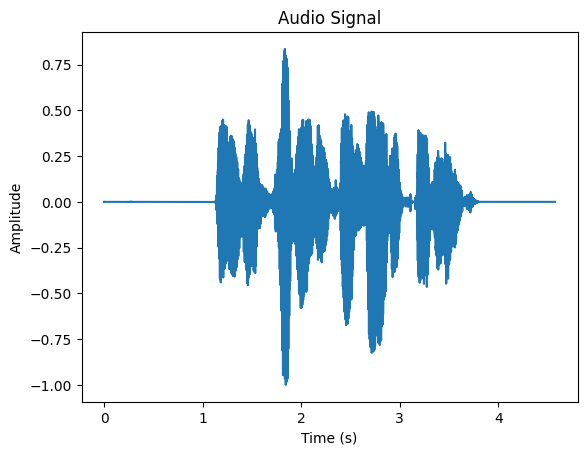

In [39]:
plt.figure()
plt.plot(time, signal)
plt.title("Audio Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

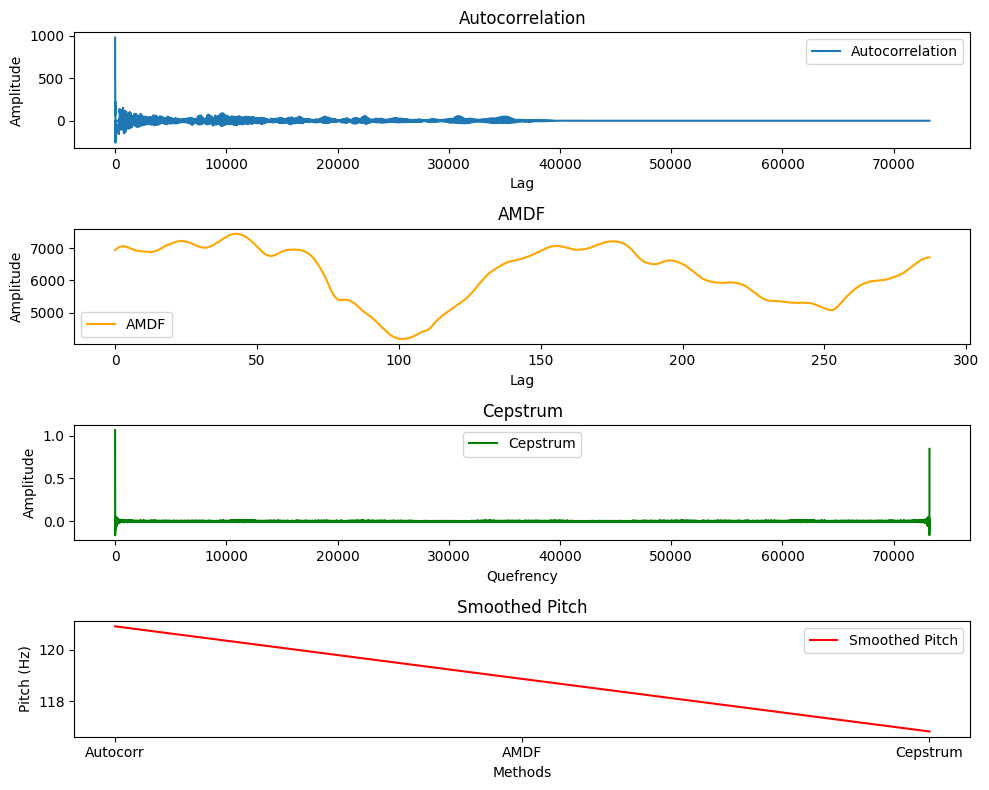

In [48]:
pitch_values = np.array([pitch_autocorr, pitch_amdf, pitch_cepstrum])
smoothed_pitch = uniform_filter1d(pitch_values, size=3)

plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(autocorr_vals, label="Autocorrelation")
plt.title("Autocorrelation")
plt.xlabel("Lag")
plt.ylabel("Amplitude")
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(amdf_vals, label="AMDF", color='orange')
plt.title("AMDF")
plt.xlabel("Lag")
plt.ylabel("Amplitude")
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(cepstrum_vals, label="Cepstrum", color='green')
plt.title("Cepstrum")
plt.xlabel("Quefrency")
plt.ylabel("Amplitude")
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(smoothed_pitch, label="Smoothed Pitch", color='red')
plt.title("Smoothed Pitch")
plt.xlabel("Methods")
plt.ylabel("Pitch (Hz)")
plt.xticks([0, 1, 2], ["Autocorr", "AMDF", "Cepstrum"])
plt.legend()

plt.tight_layout()
plt.show()